In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
from torchvision import transforms

from torch.utils.data import Dataset, DataLoader

from tqdm.autonotebook import tqdm

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pandas as pd

from sklearn.metrics import accuracy_score

import time

from idlmam import train_network, Flatten, weight_reset, set_seed
from idlmam import LanguageNameDataset, pad_and_pack, EmbeddingPackable, LastTimeStep, LambdaLayer

C:\Users\steph\AppData\Local\Temp\ipykernel_20228\3017011646.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
train_data = torchvision.datasets.FashionMNIST("./", train=True, transform=transforms.ToTensor(), download=True) 
test_data = torchvision.datasets.FashionMNIST("./", train=True, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True) 
test_loader = DataLoader(test_data, batch_size=128)

100%|██████████| 26421880/26421880 [00:01<00:00, 16006637.86it/s]


Extracting ./FashionMNIST\raw\train-images-idx3-ubyte.gz to ./FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 675850.62it/s]


Extracting ./FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 12773654.49it/s]


Extracting ./FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./FashionMNIST\raw



In [7]:
W, H = 28, 28
D = 28*28
n = 256
C = 1

n_filters = 32

classes = 10
device = 'cuda'

In [8]:
fc_model = nn.Sequential( 
    nn.Flatten(), 
    nn.Linear(D, n), 
    nn.Tanh(),
    *[nn.Sequential(nn.Linear(n, n),nn.Tanh()) for _ in range(5)],
    nn.Linear(n, classes), 
)

In [9]:
cnn_model = nn.Sequential( 
    nn.Conv2d(C, n_filters, 3, padding=1),             nn.Tanh(), 
    nn.Conv2d(n_filters, n_filters, 3, padding=1),     nn.Tanh(), 
    nn.Conv2d(n_filters, n_filters, 3, padding=1),     nn.Tanh(), 
    nn.MaxPool2d((2,2)), 
    nn.Conv2d( n_filters, 2*n_filters, 3, padding=1),  nn.Tanh(), 
    nn.Conv2d(2*n_filters, 2*n_filters, 3, padding=1), nn.Tanh(), 
    nn.Conv2d(2*n_filters, 2*n_filters, 3, padding=1), nn.Tanh(), 
    nn.MaxPool2d((2,2)), 
    nn.Conv2d(2*n_filters, 4*n_filters, 3, padding=1), nn.Tanh(), 
    nn.Conv2d(4*n_filters, 4*n_filters, 3, padding=1), nn.Tanh(), 
    nn.Flatten(), 
    nn.Linear(D*n_filters//4, classes), 
)

In [10]:
loss_func = nn.CrossEntropyLoss() 
fc_results = train_network(fc_model, loss_func, train_loader, 

test_loader=test_loader, epochs=10, 
score_funcs={"Accuracy": accuracy_score}, device=device) 
cnn_results = train_network(cnn_model, loss_func, train_loader, test_loader=test_loader, epochs=10, score_funcs={"Accuracy": accuracy_score}, device=device)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

In [11]:
del fc_model 
del cnn_model

<Axes: xlabel='epoch', ylabel='test Accuracy'>

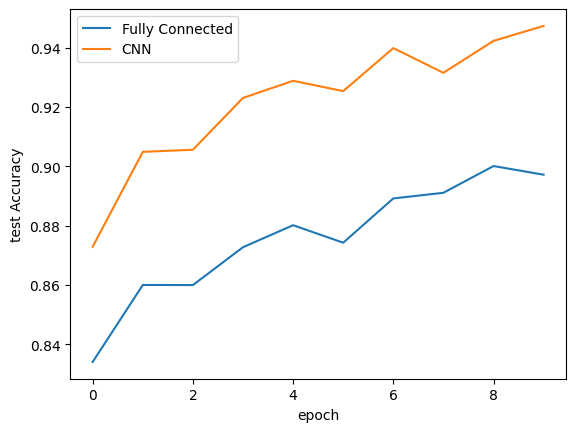

In [15]:
sns.lineplot(x='epoch', y='test Accuracy', data=fc_results, label='Fully Connected') 
sns.lineplot(x='epoch', y='test Accuracy', data=cnn_results, label='CNN')

In [16]:
def leaky_relu(x, alpha=0.1):                              
    return max(alpha*x, x) 

In [17]:
leak_rate = 0.1

In [19]:
fc_relu_model = nn.Sequential( 
    nn.Flatten(), 
    nn.Linear(D, n), nn.LeakyReLU(leak_rate), 
    *[nn.Sequential(nn.Linear(n, n), nn.LeakyReLU(leak_rate)) for _ in range(5)], 
    nn.Linear(n, classes), 
)

In [22]:
def cnnLayer(in_filters, out_filters=None, kernel_size=3): 
    """
    in_filters: how many channels are coming into the layer 
    out_filters: how many channels this layer should learn / output, or None
    if we want to have the same number of channels as the input. 
        kernel_size: how large the kernel should be 
        """
    if out_filters is None: 
        out_filters = in_filters 
    padding=kernel_size//2
    return nn.Sequential(
        nn.Conv2d(in_filters, out_filters, kernel_size, padding=padding), 
        nn.LeakyReLU(leak_rate)
        )

In [23]:
cnn_relu_model = nn.Sequential( 
    cnnLayer(C, n_filters), cnnLayer(n_filters), cnnLayer(n_filters), 
    nn.MaxPool2d((2,2)), 
    cnnLayer(n_filters, 2*n_filters), 
    cnnLayer(2*n_filters), 
    cnnLayer(2*n_filters), 
    nn.MaxPool2d((2,2)), 
    cnnLayer(2*n_filters, 4*n_filters), cnnLayer(4*n_filters), 
    nn.Flatten(), 
    nn.Linear(D*n_filters//4, classes), 
)

In [24]:
fc_relu_results = train_network(fc_relu_model, loss_func, train_loader, test_loader=test_loader, epochs=10, score_funcs={'Accuracy': accuracy_score}, device=device) 
del fc_relu_model 
cnn_relu_results = train_network(cnn_relu_model, loss_func, train_loader, test_loader=test_loader, epochs=10, score_funcs={'Accuracy': accuracy_score}, device=device) 
del cnn_relu_model

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

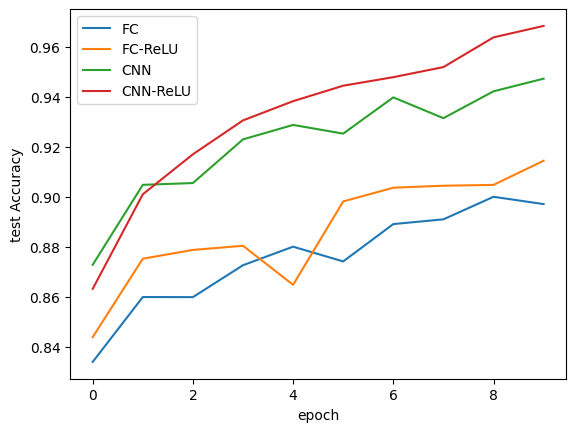

In [25]:
sns.lineplot(x='epoch', y='test Accuracy', data=fc_results, label='FC') 
sns.lineplot(x='epoch', y='test Accuracy', data=fc_relu_results, label='FC-ReLU') 
sns.lineplot(x='epoch', y='test Accuracy', data=cnn_results, label='CNN') 
sns.lineplot(x='epoch', y='test Accuracy', data=cnn_relu_results, label='CNN-ReLU')

In [26]:
fc_bn_model = nn.Sequential( 
    nn.Flatten(), 
    nn.Linear(D, n), nn.BatchNorm1d(n), nn.LeakyReLU(leak_rate), 
    *[nn.Sequential(nn.Linear(n, n), nn.BatchNorm1d(n), 
    nn.LeakyReLU(leak_rate)) for _ in range(5)], 
    nn.Linear(n, classes), 
)

In [27]:
def cnnLayer(in_filters, out_filters=None, kernel_size=3): 

    if out_filters is None: 
        out_filters = in_filters

    padding=kernel_size//2

    return nn.Sequential(
        nn.Conv2d(in_filters, out_filters, kernel_size, padding=padding),
        nn.BatchNorm2d(out_filters),
        nn.LeakyReLU(leak_rate) 
)

In [ ]:
fc_bn_results = train_network(fc_bn_model, loss_func, train_loader, test_loader=test_loader, epochs=10, score_funcs={'Accuracy': accuracy_score}, device=device) 
del fc_bn_model

cnn_bn_results = train_network(cnn_bn_model, loss_func, train_loader, test_loader=test_loader, epochs=10, score_funcs={'Accuracy': accuracy_score}, device=device) 
del cnn_bn_model